### Import data and metrics 

In [129]:
import numpy as np
import pandas as pd

#df = pd.read_csv (r'C:\Repository\machine-learning\sentinel-water-detection\data-preparation\data\Final_data_9k.csv')
df = pd.read_csv (r'Final_data_9k.csv')

display(df)

,system:index,AreaM2,B11,B12,B2,B3,B4,B8,class,FEATURETYP,.geo
0,00000000000000000000_0,NaN,4115.5,2839.0,922.0,1356.0,1982.0,3163.0,0,Land,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,00000000000000000001_0,NaN,3298.0,2508.5,647.0,977.0,1562.0,2370.0,0,Land,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,00000000000000000002_0,NaN,1592.0,975.0,199.5,379.5,355.5,2510.0,0,Land,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,00000000000000000003_0,NaN,2466.0,1534.0,521.0,780.0,1006.0,2416.0,0,Land,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,00000000000000000004_0,NaN,1976.0,1143.0,438.5,844.5,689.0,3932.0,0,Land,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...
8989,00000000000000000afd_0,2854.577436,4798.0,3783.5,1483.0,1922.0,2524.0,3396.0,1,Farm Dam Area,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
8990,00000000000000001022_0,268.200000,2252.0,1473.0,490.0,785.0,771.0,2454.0,1,Farm Dam Area,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
8991,000000000000000011ef_0,600.768860,967.0,465.0,151.0,334.0,247.0,1210.0,1,Farm Dam Area,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
8992,0000000000000000079d_0,105.212404,2991.0,1934.5,386.5,597.0,597.5,2155.0,1,Farm Dam Area,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


The dataset:
FEATURETYP  counts
Farm Dam Area 3779
Lake 486
Land 4679
Reservoir Area 1
Swamp 12
Watercourse Area 37
[['Farm Dam Area', 3779], ['Lake', 486], ['Land', 4679], ['Reservoir Area', 1], ['Swamp', 12], ['Watercourse Area', 37]]

Original dataset has rows: 8994
Removing rows with FEATURETYP != Farm Dam Area...

Now dataset has rows: 3779


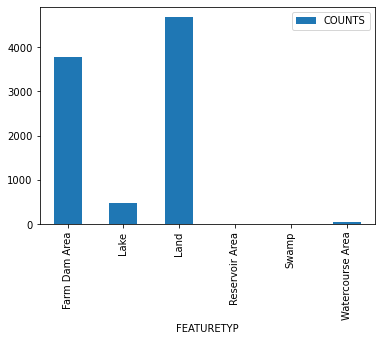

In [130]:
import matplotlib.pyplot as plt

#print the values of response variable - calss
label = []
for j in df['FEATURETYP']:
    label.append(j)
unique_label = np.unique(label)
print('The dataset:')
print('FEATURETYP  counts')
df2 =[]
for i in unique_label:
    print(i, label.count(i))
    df2.append([i,label.count(i)])
    
#df2 = df['FEATURETYP', 'class']

print(df2)
df2 = pd.DataFrame(df2, columns=['FEATURETYP', 'COUNTS'])

df2.plot.bar(x='FEATURETYP', y='COUNTS')

print('\nOriginal dataset has rows:', len(df))
#lets remove all rows except for FEATURETYP=Farm Dam Area
print('Removing rows with FEATURETYP != Farm Dam Area...')
df = df[df['FEATURETYP']=='Farm Dam Area']   #remove all rows with FEATURETYP != Farm Dam Area
print('\nNow dataset has rows:', len(df))



In [2]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time
from sklearn.metrics import accuracy_score
from pprint import pprint
import math
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

### Define features and response variables

In [3]:
features = df.drop(['system:index', 'AreaM2', 'FEATURETYP', '.geo', 'class'], axis = 1)
response = df['class']
display(features)
display(response)

,B11,B12,B2,B3,B4,B8
0,4115.5,2839.0,922.0,1356.0,1982.0,3163.0
1,3298.0,2508.5,647.0,977.0,1562.0,2370.0
2,1592.0,975.0,199.5,379.5,355.5,2510.0
3,2466.0,1534.0,521.0,780.0,1006.0,2416.0
4,1976.0,1143.0,438.5,844.5,689.0,3932.0
...,...,...,...,...,...,...
8989,4798.0,3783.5,1483.0,1922.0,2524.0,3396.0
8990,2252.0,1473.0,490.0,785.0,771.0,2454.0
8991,967.0,465.0,151.0,334.0,247.0,1210.0
8992,2991.0,1934.5,386.5,597.0,597.5,2155.0


0       0
1       0
2       0
3       0
4       0
       ..
8989    1
8990    1
8991    1
8992    1
8993    1
Name: class, Length: 8994, dtype: int64

### Feature Importance

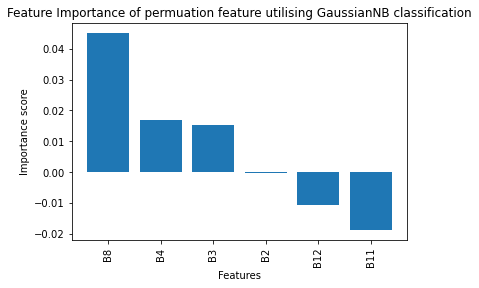

In [4]:
# permutation feature importance with gaussian NB for classification
# defining model
gnb = GaussianNB()

# fit model
X = features
y = response

gnb.fit(X, y)
#Permutation importance
results = permutation_importance(gnb, X, y, scoring ='accuracy')

#Importance values respective of feature
importance = results.importances_mean

# Sort feature importance in descending order
sorted_features = np.argsort(importance)[::-1] 

# plot feature importance
plt.bar(range(X.shape[1]), importance[sorted_features])
plt.title('Feature Importance of permuation feature utilising GaussianNB classification')
plt.xticks(range(X.shape[1]), X.columns[sorted_features], rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance score')
plt.show()

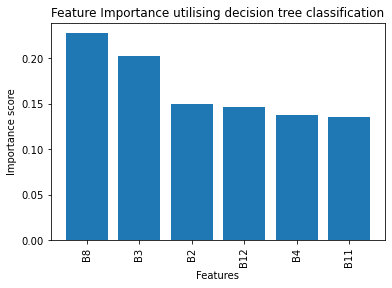

In [5]:
# permutation feature importance with decision tree for classification
# defining model
dtc = DecisionTreeClassifier()

# fit model
X = features
y = response

dtc.fit(X, y)

# get importance
importance = dtc.feature_importances_


# Sort feature importance in descending order
sorted_features = np.argsort(importance)[::-1] 

# plot feature importance
plt.bar(range(X.shape[1]), importance[sorted_features])
plt.title('Feature Importance utilising decision tree classification')
plt.xticks(range(X.shape[1]), X.columns[sorted_features], rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance score')
plt.show()

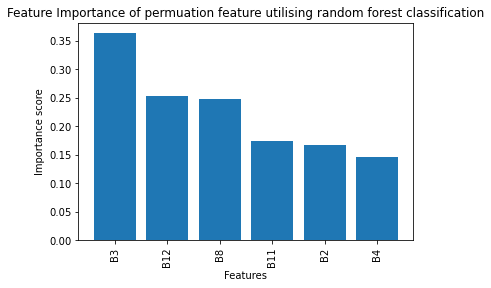

In [6]:
# permutation feature importance with random forest for classification
# defining model
rfc = RandomForestClassifier(n_estimators = 400)

# fit model
X = features
y = response

rfc.fit(X, y)
#Permutation importance
results = permutation_importance(rfc, X, y, scoring ='accuracy')

#Importance values respective of feature
importance = results.importances_mean

# Sort feature importance in descending order
sorted_features = np.argsort(importance)[::-1] 

# plot feature importance
plt.bar(range(X.shape[1]), importance[sorted_features])
plt.title('Feature Importance of permuation feature utilising random forest classification')
plt.xticks(range(X.shape[1]), X.columns[sorted_features], rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance score')
plt.show()

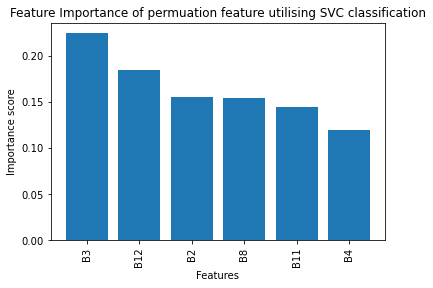

In [19]:
# permutation feature importance with SVM for classification
# defining model
svm = SVC(kernel='linear')

# fit model
X = features
y = response

svm.fit(X, y)
#Permutation importance
results = permutation_importance(svm, X, y, scoring ='accuracy')

#Importance values respective of feature
importance = results.importances_mean

# Sort feature importance in descending order
sorted_features = np.argsort(importance)[::-1] 

# plot feature importance
plt.bar(range(X.shape[1]), importance[sorted_features])
plt.title('Feature Importance of permuation feature utilising SVC classification')
plt.xticks(range(X.shape[1]), X.columns[sorted_features], rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance score')
plt.show()

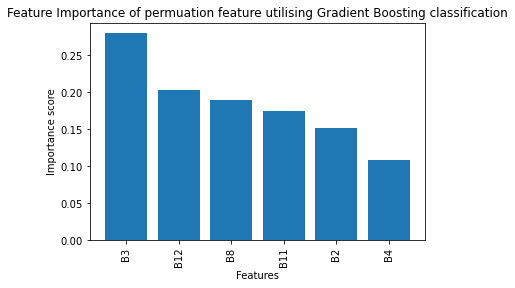

In [20]:
# permutation feature importance with gradient tree boost for classification
# defining model
gbc = GradientBoostingClassifier(n_estimators = 400, learning_rate = 0.1)

# fit model
X = features
y = response

gbc.fit(X, y)
#Permutation importance
results = permutation_importance(gbc, X, y, scoring ='accuracy')

#Importance values respective of feature
importance = results.importances_mean

# Sort feature importance in descending order
sorted_features = np.argsort(importance)[::-1] 

# plot feature importance
plt.bar(range(X.shape[1]), importance[sorted_features])
plt.title('Feature Importance of permuation feature utilising Gradient Boosting classification')
plt.xticks(range(X.shape[1]), X.columns[sorted_features], rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance score')
plt.show()

### Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

### Grid Search for hyperparameter tuning

In [22]:
# Grid searching key hyperparameters for GaussianNB
model = GaussianNB()
var_smoothing = 1e-09, 1e-08, 1e-07
# define grid search
grid = dict(var_smoothing=var_smoothing)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.550546 using {'var_smoothing': 1e-09}
0.550546 (0.018085) with: {'var_smoothing': 1e-09}
0.550546 (0.018085) with: {'var_smoothing': 1e-08}
0.550546 (0.018085) with: {'var_smoothing': 1e-07}


In [23]:
# Grid searching key hyperparameters for gradient tree boost
model = GradientBoostingClassifier()
learning_rate = 0.1, 0.2, 0.3, 0.4, 0.5
n_estimators = 50, 100, 200, 400
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.735077 using {'learning_rate': 0.1, 'n_estimators': 400}
0.694830 (0.022258) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.714369 (0.018806) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.728295 (0.019473) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.735077 (0.016685) with: {'learning_rate': 0.1, 'n_estimators': 400}
0.716754 (0.018432) with: {'learning_rate': 0.2, 'n_estimators': 50}
0.725330 (0.019673) with: {'learning_rate': 0.2, 'n_estimators': 100}
0.733963 (0.018127) with: {'learning_rate': 0.2, 'n_estimators': 200}
0.733752 (0.018482) with: {'learning_rate': 0.2, 'n_estimators': 400}
0.722737 (0.019801) with: {'learning_rate': 0.3, 'n_estimators': 50}
0.729783 (0.015735) with: {'learning_rate': 0.3, 'n_estimators': 100}
0.732271 (0.019743) with: {'learning_rate': 0.3, 'n_estimators': 200}
0.731953 (0.020593) with: {'learning_rate': 0.3, 'n_estimators': 400}
0.723477 (0.020712) with: {'learning_rate': 0.4, 'n_estimators': 50}
0.727185 (0.016232) with: {'l

In [24]:
# Grid searching key hyperparameters for random forest
model = RandomForestClassifier()
n_estimators = 50, 100, 200, 400
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.732163 using {'n_estimators': 400}
0.728297 (0.020209) with: {'n_estimators': 50}
0.730679 (0.018214) with: {'n_estimators': 100}
0.730946 (0.017268) with: {'n_estimators': 200}
0.732163 (0.018020) with: {'n_estimators': 400}


In [25]:
# Grid searching key hyperparameters for SVM
model = SVC()
kernel = 'linear', 'poly', 'rbf', 'sigmoid'
# define grid search
grid = dict(kernel=kernel)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.725969 using {'kernel': 'linear'}
0.725969 (0.018257) with: {'kernel': 'linear'}
0.688161 (0.020641) with: {'kernel': 'poly'}
0.722210 (0.016743) with: {'kernel': 'rbf'}
0.550330 (0.017605) with: {'kernel': 'sigmoid'}


### Model results and matrix

Accuracy: 0.5661356057799185
Precision, Recall, Fscore: (0.5648371716471354, 0.5661356057799185, 0.5567527832951507, None)
[[995 420]
 [751 533]]
              precision    recall  f1-score   support

           0       0.57      0.70      0.63      1415
           1       0.56      0.42      0.48      1284

    accuracy                           0.57      2699
   macro avg       0.56      0.56      0.55      2699
weighted avg       0.56      0.57      0.56      2699

train time: 0.0031669139862060547
test time: 0.0011260509490966797
Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}


/opt/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


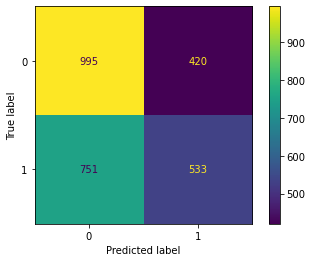

In [26]:
# NAIVE BAYES (Gaussian)
clf = GaussianNB()

start_train=time.time()
clf.fit(train_x, train_y)
stop_train=time.time()

start_test=time.time()
pred_y = clf.predict(test_x)
stop_test=time.time()

print("Accuracy:",accuracy_score(test_y, pred_y))
print("Precision, Recall, Fscore:",precision_recall_fscore_support(test_y, pred_y, average='weighted'))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y,pred_y))
print("train time:", stop_train-start_train)
print("test time:", stop_test-start_test)

print('Parameters currently in use:\n')
pprint(clf.get_params())

plot_confusion_matrix(clf, test_x,test_y, values_format='d')
plt.show()

Accuracy: 0.6758058540200074
Precision, Recall, Fscore: (0.6756888983610235, 0.6758058540200074, 0.6757361457609887, None)
[[983 432]
 [443 841]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1415
           1       0.66      0.65      0.66      1284

    accuracy                           0.68      2699
   macro avg       0.67      0.67      0.67      2699
weighted avg       0.68      0.68      0.68      2699

train time: 0.03354477882385254
test time: 0.001203775405883789
Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


/opt/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


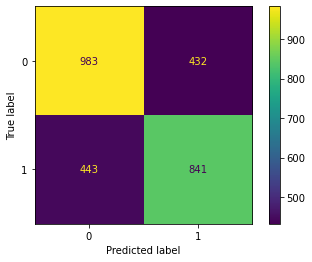

In [15]:
# DECISION TREE
clf = DecisionTreeClassifier()

start_train=time.time()
clf.fit(train_x, train_y)
stop_train=time.time()

start_test=time.time()
pred_y = clf.predict(test_x)
stop_test=time.time()

print("Accuracy:",accuracy_score(test_y, pred_y))
print("Precision, Recall, Fscore:",precision_recall_fscore_support(test_y, pred_y, average='weighted'))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y,pred_y))
print("train time:", stop_train-start_train)
print("test time:", stop_test-start_test)

print('Parameters currently in use:\n')
pprint(clf.get_params())

plot_confusion_matrix(clf, test_x,test_y, values_format='d')
plt.show()

Accuracy: 0.7547239718414227
Precision, Recall, Fscore: (0.7556978995607272, 0.7547239718414227, 0.7537009694640914, None)
[[1144  271]
 [ 391  893]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1415
           1       0.77      0.70      0.73      1284

    accuracy                           0.75      2699
   macro avg       0.76      0.75      0.75      2699
weighted avg       0.76      0.75      0.75      2699

train time: 3.145510196685791
test time: 0.010946989059448242
Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbos

/opt/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


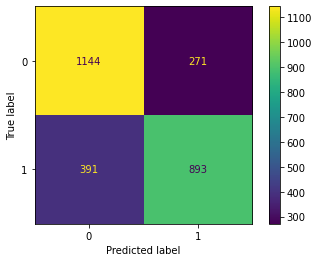

In [16]:
# GRADIENT TREE BOOST 
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators =400)

start_train=time.time()
clf.fit(train_x, train_y)
stop_train=time.time()

start_test=time.time()
pred_y = clf.predict(test_x)
stop_test=time.time()

print("Accuracy:",accuracy_score(test_y, pred_y))
print("Precision, Recall, Fscore:",precision_recall_fscore_support(test_y, pred_y, average='weighted'))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y,pred_y))
print("train time:", stop_train-start_train)
print("test time:", stop_test-start_test)

print('Parameters currently in use:\n')
pprint(clf.get_params())

plot_confusion_matrix(clf, test_x,test_y, values_format='d')
plt.show()

Accuracy: 0.7502778806965543
Precision, Recall, Fscore: (0.7515133276356115, 0.7502778806965543, 0.7490763790964092, None)
[[1144  271]
 [ 403  881]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1415
           1       0.76      0.69      0.72      1284

    accuracy                           0.75      2699
   macro avg       0.75      0.75      0.75      2699
weighted avg       0.75      0.75      0.75      2699

train time: 3.610161781311035
test time: 0.1570720672607422
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


/opt/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


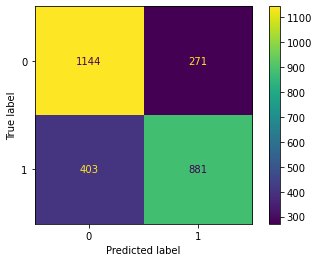

In [17]:
# Random Forest
clf = RandomForestClassifier(n_estimators=400)

start_train=time.time()
clf.fit(train_x, train_y)
stop_train=time.time()

start_test=time.time()
pred_y = clf.predict(test_x)
stop_test=time.time()

print("Accuracy:",accuracy_score(test_y, pred_y))
print("Precision, Recall, Fscore:",precision_recall_fscore_support(test_y, pred_y, average='weighted'))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y,pred_y))
print("train time:", stop_train-start_train)
print("test time:", stop_test-start_test)

print('Parameters currently in use:\n')
pprint(clf.get_params())

plot_confusion_matrix(clf, test_x,test_y, values_format='d')
plt.show()

Accuracy: 0.7469433123379029
Precision, Recall, Fscore: (0.7555178128794771, 0.7469433123379029, 0.7428757017942289, None)
[[1213  202]
 [ 481  803]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1415
           1       0.80      0.63      0.70      1284

    accuracy                           0.75      2699
   macro avg       0.76      0.74      0.74      2699
weighted avg       0.76      0.75      0.74      2699

train time: 443.40654706954956
test time: 0.13494491577148438
Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


/opt/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


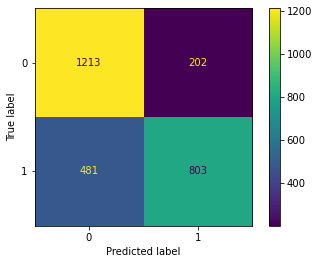

In [18]:
# SVM
clf = SVC(kernel='linear')

start_train=time.time()
clf.fit(train_x, train_y)
stop_train=time.time()

start_test=time.time()
pred_y = clf.predict(test_x)
stop_test=time.time()

print("Accuracy:",accuracy_score(test_y, pred_y))
print("Precision, Recall, Fscore:",precision_recall_fscore_support(test_y, pred_y, average='weighted'))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y,pred_y))
print("train time:", stop_train-start_train)
print("test time:", stop_test-start_test)

print('Parameters currently in use:\n')
pprint(clf.get_params())

plot_confusion_matrix(clf, test_x,test_y, values_format='d')
plt.show()